In [16]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy

In [17]:
leagues = ["standard", "hardcore", "betrayal", "hc_betrayal"]

In [18]:
df = pd.read_csv("data/edge_popularity.csv", index_col="edge")

In [19]:
normalized_df = (df-df.min())/(df.max()-df.min())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ecb42e8>,
      dtype=object)

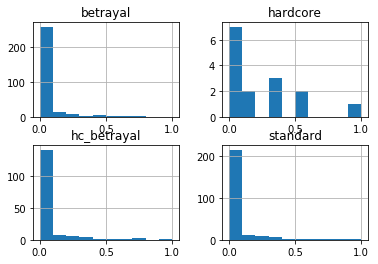

In [20]:
normalized_df.hist()

In [21]:
normalized_df.describe()

,hc_betrayal,betrayal,standard,hardcore
count,167.000000,298.000000,252.000000,15.000000
mean,0.071826,0.068197,0.066961,0.240816
std,0.156335,0.142152,0.147659,0.295941
min,0.000000,0.000000,0.000000,0.000000
25%,0.003580,0.002166,0.002649,0.006803
50%,0.010602,0.020159,0.012811,0.129252
75%,0.055211,0.067439,0.054640,0.363946
max,1.000000,1.000000,1.000000,1.000000


In [22]:
most_common_edge_thresholds = normalized_df.quantile(.8)
most_common_edge_thresholds

hc_betrayal    0.076277
betrayal       0.075626
standard       0.075976
hardcore       0.427211
Name: 0.8, dtype: float64

In [23]:
normalized_df.head(30)

,hc_betrayal,betrayal,standard,hardcore
edge,,,,
Chaos Orb-Jewellers Orb,1.000000,0.232274,0.298522,0.054422
Orb of Fusing-Chaos Orb,0.766075,0.581278,0.259075,0.000000
Orb of Alteration-Chaos Orb,0.740052,0.783817,0.332275,0.129252
Chaos Orb-Orb of Alteration,0.700537,0.412720,0.345990,0.142857
Orb of Alchemy-Chaos Orb,0.602093,0.608852,0.419381,NaN
Chaos Orb-Orb of Alchemy,0.542338,0.535962,0.306187,NaN
Chaos Orb-Orb of Fusing,0.521410,0.288843,0.566083,NaN
Jewellers Orb-Orb of Alteration,0.464133,0.098976,0.027347,NaN
Chaos Orb-Orb of Scouring,0.386755,0.348569,0.076129,NaN


In [24]:
common_profitable_edges = {}
for league in normalized_df.columns:
    edges = []
    for idx, val in enumerate(normalized_df[league]):
        if val >= most_common_edge_thresholds[league]:
            edge = normalized_df.index[idx]
            edges.append(edge)
    common_profitable_edges[league] = sorted(edges)

In [25]:
common_profitable_edges

{'hc_betrayal': ["Cartographer's Chisel-Chaos Orb",
  "Chaos Orb-Cartographer's Chisel",
  'Chaos Orb-Chromatic Orb',
  "Chaos Orb-Gemcutter's Prism",
  'Chaos Orb-Jewellers Orb',
  'Chaos Orb-Orb of Alchemy',
  'Chaos Orb-Orb of Alteration',
  'Chaos Orb-Orb of Chance',
  'Chaos Orb-Orb of Fusing',
  'Chaos Orb-Orb of Regret',
  'Chaos Orb-Orb of Scouring',
  'Chaos Orb-Regal Orb',
  'Chaos Orb-Vaal Orb',
  'Chromatic Orb-Chaos Orb',
  'Chromatic Orb-Orb of Fusing',
  'Exalted Orb-Chaos Orb',
  "Gemcutter's Prism-Chaos Orb",
  'Jewellers Orb-Chaos Orb',
  'Jewellers Orb-Orb of Alchemy',
  'Jewellers Orb-Orb of Alteration',
  'Orb of Alchemy-Chaos Orb',
  'Orb of Alchemy-Orb of Fusing',
  'Orb of Alchemy-Regal Orb',
  'Orb of Alteration-Chaos Orb',
  "Orb of Alteration-Gemcutter's Prism",
  'Orb of Alteration-Orb of Fusing',
  'Orb of Chance-Chaos Orb',
  'Orb of Fusing-Chaos Orb',
  'Orb of Regret-Chaos Orb',
  'Orb of Scouring-Chaos Orb',
  'Orb of Scouring-Orb of Fusing',
  'Orb of 

In [26]:
import json
with open('data/common_profitable_edges.json', 'w') as outfile:
    json.dump(common_profitable_edges, outfile, indent=4)